In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike = pd.read_csv("bikeshare_data.csv", index_col = 0, parse_dates = ["Start_day"])

C:\Users\Owner\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
bike.head()

,Start_day,Start_hour,Arrivals,Departures,Diff,Start_station_number,Start_station,Latitude,Longitude,Capacity,Region_name,cumu_sum,percent_full,weekend_flag,TAVG,TMAX,TMIN,PRCP,SNOW,Holiday
0,2019-11-26,9,2.0,0.0,2.0,0,22nd & H St NW,38.898925,-77.048852,17.0,"Washington, DC",2.0,0.117647,0,48,62,38,0.00,0.0,False
1,2019-11-27,9,1.0,0.0,1.0,0,22nd & H St NW,38.898925,-77.048852,17.0,"Washington, DC",3.0,0.176471,0,51,58,44,0.01,0.0,False
2,2019-11-28,16,1.0,0.0,1.0,0,22nd & H St NW,38.898925,-77.048852,17.0,"Washington, DC",4.0,0.235294,0,50,54,43,0.00,0.0,True
3,2019-11-30,23,1.0,0.0,1.0,0,22nd & H St NW,38.898925,-77.048852,17.0,"Washington, DC",5.0,0.294118,1,43,46,41,0.00,0.0,False
4,2019-12-01,16,0.0,1.0,-1.0,0,22nd & H St NW,38.898925,-77.048852,17.0,"Washington, DC",4.0,0.235294,1,43,46,40,0.50,0.0,False


In [4]:
bike.isnull().sum()

Start_day                    0
Start_hour                   0
Arrivals                     0
Departures                   0
Diff                         0
Start_station_number         0
Start_station                0
Latitude                240095
Longitude               240095
Capacity                240095
Region_name             240095
cumu_sum                     0
percent_full            240095
weekend_flag                 0
TAVG                         0
TMAX                         0
TMIN                         0
PRCP                         0
SNOW                         0
Holiday                      0
dtype: int64

In [5]:
bike.shape

(1786026, 20)

In [6]:
bike.dropna(inplace = True)
bike.shape

(1545931, 20)

## data cleaning

vars: availability, station, hour, month, day of week, weekend, in DC, tmp vars, holiday

In [7]:
bike.columns

Index(['Start_day', 'Start_hour', 'Arrivals', 'Departures', 'Diff',
       'Start_station_number', 'Start_station', 'Latitude', 'Longitude',
       'Capacity', 'Region_name', 'cumu_sum', 'percent_full', 'weekend_flag',
       'TAVG', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'Holiday'],
      dtype='object')

In [8]:
bike.dtypes

Start_day               datetime64[ns]
Start_hour                       int64
Arrivals                       float64
Departures                     float64
Diff                           float64
Start_station_number             int64
Start_station                   object
Latitude                       float64
Longitude                      float64
Capacity                       float64
Region_name                     object
cumu_sum                       float64
percent_full                   float64
weekend_flag                     int64
TAVG                             int64
TMAX                             int64
TMIN                             int64
PRCP                           float64
SNOW                           float64
Holiday                           bool
dtype: object

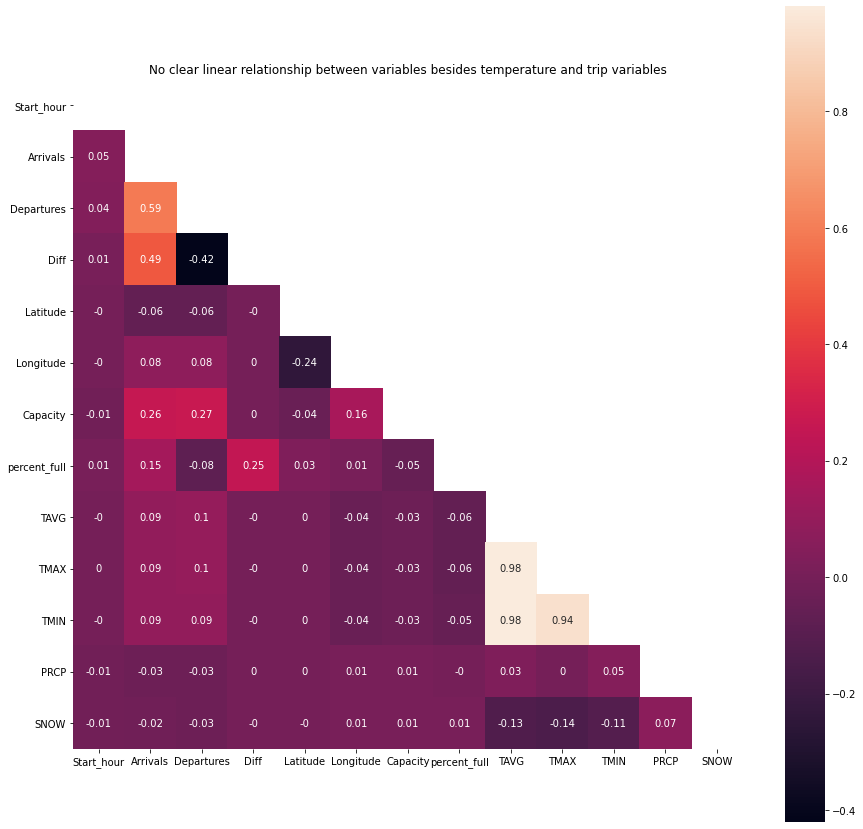

<Figure size 1080x1080 with 0 Axes>

In [9]:
plt.figure(figsize=(15,15))
ax = plt.axes()
corr = bike[['Start_hour', 'Arrivals', 'Departures', 'Diff', 'Latitude', 'Longitude', 'Capacity', 'percent_full', 'TAVG', 'TMAX', 'TMIN', 'PRCP', 'SNOW']].corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
sns.heatmap(corr, mask=mask, annot = True, square=True, ax = ax)
ax.set_title("No clear linear relationship between variables besides temperature and trip variables")
plt.show()

In [10]:
## dropping the redundant information
var = ["Start_day", "Start_hour", "Start_station", "Longitude", "Latitude", "Region_name", "percent_full", "weekend_flag", "TAVG", "TMAX", "TMIN", "PRCP", "SNOW", "Holiday"]
# eda data
bike = bike[var]

In [11]:
## cleaning up names
bike.columns = ["_".join(col.split(" ")).lower() for col in bike.columns]
bike.rename({"start_day":"date", "start_hour":"hour", "start_station":"station", "weekend_flag":"weekend"}, axis = 1, inplace = True)

## defining variables

In [12]:
bike['weekday'] = bike.date.dt.dayofweek
# bike.loc[bike['weekday'] == 0, 'weekday'] = 'Mon'
# bike.loc[bike['weekday'] == 1, 'weekday'] = 'Tue'
# bike.loc[bike['weekday'] == 2, 'weekday'] = 'Wed'
# bike.loc[bike['weekday'] == 3, 'weekday'] = 'Thu'
# bike.loc[bike['weekday'] == 4, 'weekday'] = 'Fri'
# bike.loc[bike['weekday'] == 5, 'weekday'] = 'Sat'
# bike.loc[bike['weekday'] == 6, 'weekday'] = 'Sun'
# bike['weekday'] = bike['weekday'].astype("category")

In [13]:
# defining variables
bike['month'] = bike.date.dt.month

In [14]:
bike['in_dc'] = bike.region_name.apply(lambda x: 1 if x == "Washington, DC" else 0)

In [15]:
bike['holiday'] = bike.holiday.apply(lambda x: 1 if x == True else 0)

In [16]:
bike.head()

,date,hour,station,longitude,latitude,region_name,percent_full,weekend,tavg,tmax,tmin,prcp,snow,holiday,weekday,month,in_dc
0,2019-11-26,9,22nd & H St NW,-77.048852,38.898925,"Washington, DC",0.117647,0,48,62,38,0.00,0.0,0,1,11,1
1,2019-11-27,9,22nd & H St NW,-77.048852,38.898925,"Washington, DC",0.176471,0,51,58,44,0.01,0.0,0,2,11,1
2,2019-11-28,16,22nd & H St NW,-77.048852,38.898925,"Washington, DC",0.235294,0,50,54,43,0.00,0.0,1,3,11,1
3,2019-11-30,23,22nd & H St NW,-77.048852,38.898925,"Washington, DC",0.294118,1,43,46,41,0.00,0.0,0,5,11,1
4,2019-12-01,16,22nd & H St NW,-77.048852,38.898925,"Washington, DC",0.235294,1,43,46,40,0.50,0.0,0,6,12,1


In [17]:
bike["station"] = bike["station"].astype("category")

## regression version of modeling

First, we try to model using only the response variable (% availability). Using this information could help vendors identify roughly what percentage of bikes that are expected to be at a given station at a given point in time.

In [18]:
# relocating column to front before test/train split
bike.reset_index(inplace=True, drop = True)
tmp = bike.pop('percent_full')
bike.insert(0, tmp.name, tmp)
del tmp

In [19]:
bike.set_index('station', inplace = True)
bike.head()

,percent_full,date,hour,longitude,latitude,region_name,weekend,tavg,tmax,tmin,prcp,snow,holiday,weekday,month,in_dc
station,,,,,,,,,,,,,,,,
22nd & H St NW,0.117647,2019-11-26,9,-77.048852,38.898925,"Washington, DC",0,48,62,38,0.00,0.0,0,1,11,1
22nd & H St NW,0.176471,2019-11-27,9,-77.048852,38.898925,"Washington, DC",0,51,58,44,0.01,0.0,0,2,11,1
22nd & H St NW,0.235294,2019-11-28,16,-77.048852,38.898925,"Washington, DC",0,50,54,43,0.00,0.0,1,3,11,1
22nd & H St NW,0.294118,2019-11-30,23,-77.048852,38.898925,"Washington, DC",1,43,46,41,0.00,0.0,0,5,11,1
22nd & H St NW,0.235294,2019-12-01,16,-77.048852,38.898925,"Washington, DC",1,43,46,40,0.50,0.0,0,6,12,1


In [20]:
# dropping observations in model fitting due to insufficient sample size (less than 30 for testing data)
exclude = bike.groupby(bike.index)['percent_full'].count().sort_values()[bike.groupby(bike.index)['percent_full'].count().sort_values() < 30/.3].index.tolist()
exclude

['Ridge Rd Community Center',
 'Fort Stanton Rec Center',
 'Valley Ave & Wheeler Rd SE',
 'Kenilworth Terrace & Hayes St. NE',
 'National Harbor Carousel',
 'Capitol Heights Metro',
 'Shady Grove Hospital',
 'Campus Commons',
 'Southern Ave Metro',
 'Reston Regional Library',
 'Joliet St & MLK Ave SW/Bald Eagle Rec Ctr',
 'Wheaton Library & Community Rec Center',
 'Key West Ave & Great Seneca Hwy']

In [21]:
bike.shape

(1545931, 16)

In [22]:
bike.index.nunique()

488

In [23]:
len(set(bike.index.unique()).difference(set(exclude)))

475

In [24]:
c = list(set(bike.index.unique()).difference(set(exclude)))
len(c)

475

In [27]:
c

['Jones Branch & Westbranch Dr',
 'Pooks Hill Rd & Linden Ave',
 'Montello Ave & Holbrook Terr NE',
 'Eastern Market / 7th & North Carolina Ave SE',
 '18th & Monroe St NE',
 '15th & F St NE',
 'Sunset Hills & Old Reston Ave',
 '48th Pl & MacArthur Blvd NW',
 '8th & F St NE',
 'Falls Church City Hall / Park Ave & Little Falls St',
 '23rd & M St NW',
 '20th & E St NW',
 'United Medical Center',
 'Crystal Dr & 15th St S',
 'North Shore Dr & Village Rd',
 'Sunset Hills Rd & Isaac Newton Square',
 '8th & K St NE',
 'Mississippi Ave & 19th St SE / THEARC',
 'Mount Vernon Ave & Kennedy St',
 'White Flint Metro',
 'Good Hope Rd & MLK Ave SE',
 'Alabama & MLK Ave SE',
 'Maine Ave & 9th St SW',
 '9th & Upshur St NW',
 'Frederick Ave & Horners Ln',
 '18th & R St NW',
 '7th St & Massachusetts Ave NE',
 "Prince George's Plaza Metro",
 '4th St & Madison Dr NW',
 'Tysons Corner Station',
 '13th & H St NE',
 'Crystal Dr & 27th St S',
 'Neal St & Trinidad Ave NE',
 'Roosevelt Island',
 'Harvard St & Ad

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
bike_model = bike.copy()
bike_model.pop('date')
bike_model.pop('region_name')
bike_model = bike_model[bike.index.isin(c)]
bike_model.shape

(1545258, 14)

In [28]:
bike_model

,percent_full,hour,longitude,latitude,weekend,tavg,tmax,tmin,prcp,snow,holiday,weekday,month,in_dc
station,,,,,,,,,,,,,,
22nd & H St NW,0.117647,9,-77.048852,38.898925,0,48,62,38,0.00,0.0,0,1,11,1
22nd & H St NW,0.176471,9,-77.048852,38.898925,0,51,58,44,0.01,0.0,0,2,11,1
22nd & H St NW,0.235294,16,-77.048852,38.898925,0,50,54,43,0.00,0.0,1,3,11,1
22nd & H St NW,0.294118,23,-77.048852,38.898925,1,43,46,41,0.00,0.0,0,5,11,1
22nd & H St NW,0.235294,16,-77.048852,38.898925,1,43,46,40,0.50,0.0,0,6,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W Columbia St & N Washington St,0.250000,13,-77.166917,38.885621,0,40,55,31,0.00,0.0,0,3,12,0
W Columbia St & N Washington St,0.250000,11,-77.166917,38.885621,1,50,67,38,0.00,0.0,0,5,12,0
W Columbia St & N Washington St,0.416667,13,-77.166917,38.885621,1,50,67,38,0.00,0.0,0,5,12,0


In [199]:
#bike_model_individual = bike_model.drop(columns = ["longitude", "latitude", "in_dc"])
bike_model_individual = bike_model.copy()
bike_model_individual

,percent_full,hour,longitude,latitude,weekend,tavg,tmax,tmin,prcp,snow,holiday,weekday,month,in_dc
station,,,,,,,,,,,,,,
22nd & H St NW,0.117647,9,-77.048852,38.898925,0,48,62,38,0.00,0.0,0,1,11,1
22nd & H St NW,0.176471,9,-77.048852,38.898925,0,51,58,44,0.01,0.0,0,2,11,1
22nd & H St NW,0.235294,16,-77.048852,38.898925,0,50,54,43,0.00,0.0,1,3,11,1
22nd & H St NW,0.294118,23,-77.048852,38.898925,1,43,46,41,0.00,0.0,0,5,11,1
22nd & H St NW,0.235294,16,-77.048852,38.898925,1,43,46,40,0.50,0.0,0,6,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W Columbia St & N Washington St,0.250000,13,-77.166917,38.885621,0,40,55,31,0.00,0.0,0,3,12,0
W Columbia St & N Washington St,0.250000,11,-77.166917,38.885621,1,50,67,38,0.00,0.0,0,5,12,0
W Columbia St & N Washington St,0.416667,13,-77.166917,38.885621,1,50,67,38,0.00,0.0,0,5,12,0


In [200]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(bike_model_individual.iloc[:,1:], bike_model_individual.iloc[:,0], test_size = 0.3, random_state = 0, stratify = bike_model_individual.index)

In [201]:
X_train_i[X_train_i.index == c[0]]

,hour,longitude,latitude,weekend,tavg,tmax,tmin,prcp,snow,holiday,weekday,month,in_dc
station,,,,,,,,,,,,,
23rd & M St NW,13,-77.050264,38.905303,0,80,91,71,0.00,0.0,0,3,8,1
23rd & M St NW,20,-77.050264,38.905303,0,83,90,72,0.00,0.0,0,0,7,1
23rd & M St NW,13,-77.050264,38.905303,1,78,85,66,0.00,0.0,0,5,8,1
23rd & M St NW,16,-77.050264,38.905303,0,53,64,44,0.00,0.0,0,1,11,1
23rd & M St NW,18,-77.050264,38.905303,0,67,79,57,0.00,0.0,0,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23rd & M St NW,12,-77.050264,38.905303,1,68,77,63,0.00,0.0,0,6,4,1
23rd & M St NW,5,-77.050264,38.905303,1,73,86,63,0.00,0.0,0,5,9,1
23rd & M St NW,4,-77.050264,38.905303,1,76,85,67,0.01,0.0,0,6,6,1


In [202]:
X_test_i[X_test_i.index == c[0]]

,hour,longitude,latitude,weekend,tavg,tmax,tmin,prcp,snow,holiday,weekday,month,in_dc
station,,,,,,,,,,,,,
23rd & M St NW,12,-77.050264,38.905303,1,38,43,35,0.07,0.0,0,5,3,1
23rd & M St NW,15,-77.050264,38.905303,0,81,94,72,0.00,0.0,0,0,9,1
23rd & M St NW,23,-77.050264,38.905303,0,64,74,55,0.00,0.0,0,0,4,1
23rd & M St NW,15,-77.050264,38.905303,1,73,86,63,0.00,0.0,0,5,9,1
23rd & M St NW,19,-77.050264,38.905303,0,46,52,44,0.75,0.0,0,0,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23rd & M St NW,16,-77.050264,38.905303,1,84,92,74,0.72,0.0,0,5,7,1
23rd & M St NW,2,-77.050264,38.905303,0,63,73,50,0.00,0.0,0,1,10,1
23rd & M St NW,5,-77.050264,38.905303,1,80,91,70,0.00,0.0,0,5,8,1


## Approach 1 - fitting individual stations and assessing performance

note that location based features were dropped (latitude, longitude, and in_DC) were dropped since these are constant variables when modeling on each station, and so do not help to improve the predictive power of the model.

### linear regression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [203]:
tmp_train = X_train_i.drop(columns = ["longitude", "latitude", "in_dc"])
tmp_test = X_test_i.drop(columns = ["longitude", "latitude", "in_dc"])
def error_regression(station_id):
    regressor = LinearRegression()
    regressor.fit(tmp_train[tmp_train.index == station_id], y_train_i[tmp_train.index == station_id])
    y_pred = regressor.predict(tmp_test[tmp_test.index == station_id])
    return mean_squared_error(y_test_i[tmp_test.index == station_id], y_pred)

In [204]:
accuracy_scores = []
for i in range(len(c)):
    accuracy_scores.append(error_regression(c[i]))

In [205]:
np.array(accuracy_scores)[np.logical_or(np.array(accuracy_scores) < 0,np.array(accuracy_scores) > 1)] 

array([], dtype=float64)

In [206]:
#pd.Series(np.array(accuracy_scores)[np.where(np.array(accuracy_scores) < 0.1)]).describe()
pd.Series(accuracy_scores).describe()

count    475.000000
mean       0.048318
std        0.020522
min        0.008402
25%        0.033160
50%        0.047422
75%        0.063986
max        0.098451
dtype: float64

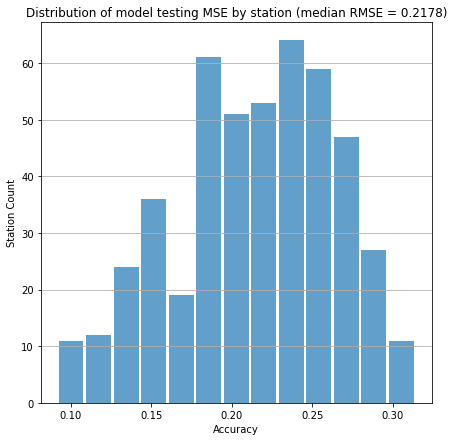

In [209]:
plt.hist(np.sqrt(np.array(accuracy_scores)), bins = "auto", alpha = 0.7, rwidth = 0.9)
plt.grid(axis = "y")
plt.title("Distribution of model testing MSE by station (median RMSE = " + str(round(np.median(np.sqrt(np.array(accuracy_scores))),4)) + ')')
plt.xlabel("Accuracy")
plt.ylabel("Station Count")
plt.show()

### random forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [210]:
## fitting a basic model without cross-validation
def error_regression_rf(station_id):
    regressor = RandomForestRegressor(n_estimators = 50, random_state = 0, max_depth = 5)
    regressor.fit(tmp_train[tmp_train.index == station_id], y_train_i[tmp_train.index == station_id])
    y_pred = regressor.predict(tmp_test[tmp_test.index == station_id])
    return mean_squared_error(y_test_i[tmp_test.index == station_id], y_pred)

In [211]:
accuracy_scores_rf = []
for i in range(len(c)):
    accuracy_scores_rf.append(error_regression_rf(c[i]))

In [212]:
np.array(accuracy_scores_rf)[np.logical_or(np.array(accuracy_scores_rf) < 0,np.array(accuracy_scores_rf) > 1)] 

array([], dtype=float64)

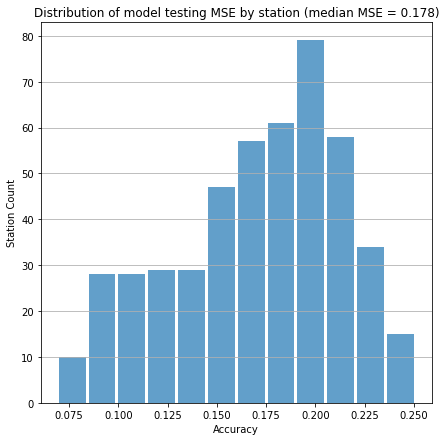

In [213]:
plt.hist(np.sqrt(np.array(accuracy_scores_rf)), bins = "auto", alpha = 0.7, rwidth = 0.9)
plt.grid(axis = "y")
plt.title("Distribution of model testing MSE by station (median MSE = " + str(round(np.median(np.sqrt(np.array(accuracy_scores_rf))),4)) + ')')
plt.xlabel("Accuracy")
plt.ylabel("Station Count")
plt.show()

In [53]:
round(pd.Series(accuracy_scores_rf).describe(), 4)

count    475.0000
mean       0.0309
std        0.0137
min        0.0048
25%        0.0207
50%        0.0317
75%        0.0412
max        0.0628
dtype: float64

### XGBoost

In [54]:
import xgboost as xgb

In [214]:
def error_regression_xgb(station_id):
    regressor = xgb.XGBRegressor(max_depth = 5, n_estimators = 50)
    regressor.fit(tmp_train[tmp_train.index == station_id], y_train_i[tmp_train.index == station_id])
    y_pred = regressor.predict(tmp_test[tmp_test.index == station_id])
    return mean_squared_error(y_test_i[tmp_test.index == station_id], y_pred)

In [215]:
accuracy_scores_xgb = []
for i in range(len(c)):
    accuracy_scores_xgb.append(error_regression_xgb(c[i]))

In [219]:
np.array(accuracy_scores_xgb)[np.logical_or(np.array(accuracy_scores_xgb) < 0,np.array(accuracy_scores_xgb) > 1)] 

array([], dtype=float64)

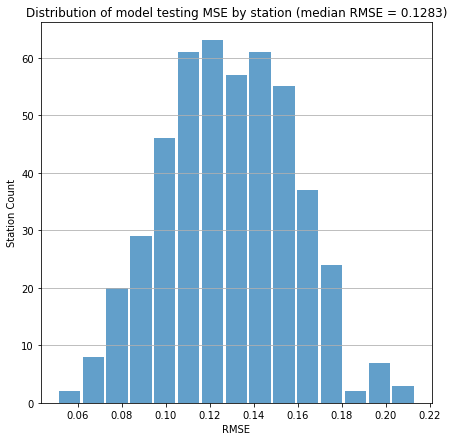

In [222]:
plt.hist(np.sqrt(np.array(accuracy_scores_xgb)), bins = "auto", alpha = 0.7, rwidth = 0.9)
plt.grid(axis = "y")
plt.title("Distribution of model testing MSE by station (median RMSE = " + str(round(np.median(np.sqrt(np.array(accuracy_scores_xgb))),4)) + ')')
plt.xlabel("RMSE")
plt.ylabel("Station Count")
plt.show()

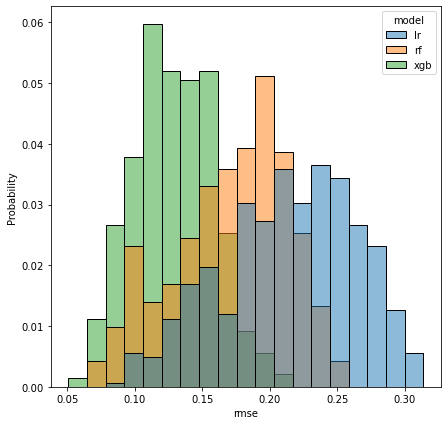

In [221]:
reg_scores_df = pd.DataFrame(data = [*zip(accuracy_scores, accuracy_scores_rf, accuracy_scores_xgb)], index = c, columns = ['lr', 'rf', 'xgb'])\
.melt(var_name = 'model', value_name = 'mse', ignore_index = False)
reg_scores_df["rmse"] = reg_scores_df["mse"] ** (1/2)
sns.histplot(data = reg_scores_df, x = 'rmse', hue = 'model', stat = 'probability', alpha = 0.5)
plt.show()

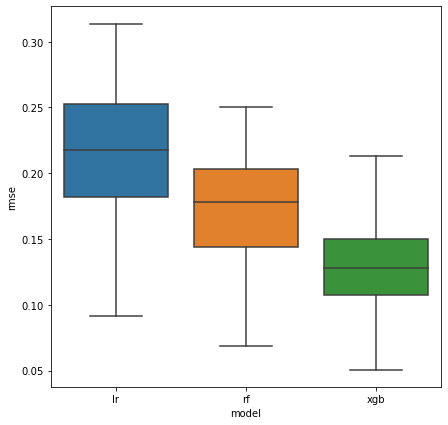

In [218]:
sns.boxplot(data = reg_scores_df, x = "model", y = "rmse")
plt.show()

In [ ]:
import matplotlib.image as mpimg
dc_img=mpimg.imread('unknown.png')

In [197]:
len(accuracy_scores_xgb)

475

In [224]:
reg_scores_df[reg_scores_df.model == "xgb"].shape

(475, 3)

In [235]:
reg_scores_df[reg_scores_df.model == "xgb"][["rmse"]]

,rmse
23rd & M St NW,0.147876
Reston Town Center Transit Station,0.108874
4th & W St NE,0.137369
Van Ness Metro / UDC,0.122812
Connecticut Ave & Tilden St NW,0.133903
...,...
Pennsylvania & Minnesota Ave SE,0.116496
1st & D St SE,0.162924
20th St & Florida Ave NW,0.183480
New Hampshire Ave & 24th St NW,0.155097


In [240]:
X_test_i[["longitude", "latitude", "in_dc"]].drop_duplicates()

,longitude,latitude,in_dc
station,,,
19th St & Pennsylvania Ave NW,-77.042900,38.900300,1
4th & W St NE,-77.000648,38.919077,1
New Jersey Ave & N St NW/Dunbar HS,-77.015360,38.907333,1
23rd & E St NW,-77.049882,38.896104,1
Columbia Rd & Georgia Ave NW,-77.023795,38.928121,1
...,...,...,...
The Mall at Prince Georges,-76.954171,38.968842,0
Greensboro & International Dr,-77.227417,38.923083,0
Key West Ave & Diamondback Dr,-77.202354,39.106152,0


In [238]:
X_test_i.groupby(X_test_i.index)[["longitude", "latitude", "in_dc"]].min()

(488, 3)

In [242]:
xgb_plotter = reg_scores_df[reg_scores_df.model == "xgb"][["rmse"]]\
.merge(X_test_i[["longitude", "latitude", "in_dc"]].drop_duplicates(), how = "inner", right_index = True, left_index = True)
xgb_plotter

,rmse,longitude,latitude,in_dc
23rd & M St NW,0.147876,-77.050264,38.905303,1
Reston Town Center Transit Station,0.108874,-77.359718,38.957037,0
4th & W St NE,0.137369,-77.000648,38.919077,1
Van Ness Metro / UDC,0.122812,-77.063896,38.944551,1
Connecticut Ave & Tilden St NW,0.133903,-77.061977,38.941139,1
...,...,...,...,...
Pennsylvania & Minnesota Ave SE,0.116496,-76.971015,38.873057,1
1st & D St SE,0.162924,-77.005965,38.884916,1
20th St & Florida Ave NW,0.183480,-77.044600,38.915400,1
New Hampshire Ave & 24th St NW,0.155097,-77.051084,38.901755,1


In [252]:
reg_scores_df.groupby("model")["rmse"].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
lr,475.0,0.214245,0.049220,0.091664,0.182097,0.217767,0.252955,0.313770
rf,475.0,0.170695,0.042075,0.068976,0.143725,0.178012,0.202976,0.250689
xgb,475.0,0.128620,0.029091,0.050766,0.107254,0.128306,0.150360,0.213382


In [253]:
reg_scores_df.groupby("model")["rmse"].median()

model
lr     0.217767
rf     0.178012
xgb    0.128306
Name: rmse, dtype: float64

In [257]:
str(round(np.mean(np.sqrt(np.array(accuracy_scores_xgb))),4))

'0.1286'

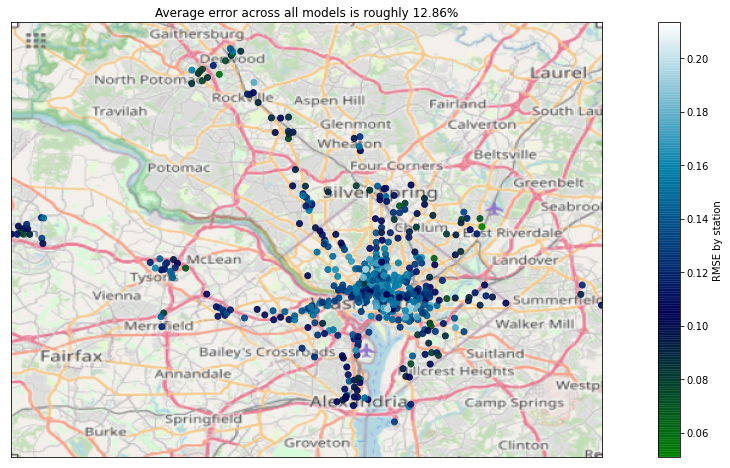

In [262]:

plt.figure(figsize=(20,8))
ax = plt.scatter(x = "longitude", data = xgb_plotter, y = "latitude", c = "rmse",
            cmap = plt.get_cmap("ocean"), alpha = 0.9)
plt.colorbar(ax, label ="RMSE by station")
plt.title("Average error across all models is roughly " + str(round(np.mean(np.sqrt(np.array(accuracy_scores_xgb))),4)*100) + "%") 
plt.xlim(-77.369,-76.825)
# The range of y-axis is the range of latitude of this map.
plt.ylim(38.75,39.15)
# Overlap the scatterplot on top of the DC map.
plt.imshow(dc_img, alpha=0.9, extent=[-77.369, -76.825, 38.75, 39.15])
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.show()

## Approach 2 - fit all data to single model and assess performance

In [72]:
bike_model.shape

(1545258, 14)

In [74]:
bike_model.columns

Index(['percent_full', 'hour', 'longitude', 'latitude', 'weekend', 'tavg',
       'tmax', 'tmin', 'prcp', 'snow', 'holiday', 'weekday', 'month', 'in_dc'],
      dtype='object')

In [75]:
bike_model.head()

,percent_full,hour,longitude,latitude,weekend,tavg,tmax,tmin,prcp,snow,holiday,weekday,month,in_dc
station,,,,,,,,,,,,,,
22nd & H St NW,0.117647,9,-77.048852,38.898925,0,48,62,38,0.00,0.0,0,1,11,1
22nd & H St NW,0.176471,9,-77.048852,38.898925,0,51,58,44,0.01,0.0,0,2,11,1
22nd & H St NW,0.235294,16,-77.048852,38.898925,0,50,54,43,0.00,0.0,1,3,11,1
22nd & H St NW,0.294118,23,-77.048852,38.898925,1,43,46,41,0.00,0.0,0,5,11,1
22nd & H St NW,0.235294,16,-77.048852,38.898925,1,43,46,40,0.50,0.0,0,6,12,1


In [99]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred) ** (1/2)

0.2557214462480275

## XGBoost

In [94]:
## xgb training matrix
# "binary:logistic"
params = {"objective":"reg:linear","max_depth":5, "colsample_bytree": 0.3, "n_estimators": 100}
dmatrix = xgb.DMatrix(data = X_train, label = y_train)

In [98]:
xg_reg = xgb.train(params=params, dtrain=dmatrix)
y_pred = xg_reg.predict(xgb.DMatrix(X_test))
mean_squared_error(y_test, y_pred) ** (1/2)

[17:45:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:45:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.2505918693692099

In [100]:
cv_results = xgb.cv(dtrain = dmatrix, params = params, nfold =3, num_boost_round = 100,
                   early_stopping_rounds = 10, as_pandas = True, seed = 123)

[17:47:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:47:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by lang

In [123]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid
xgb_model = xgb.XGBRegressor()
param_grid = {'learning_rate': np.linspace(0.1, 2, 150),
              'n_estimators': [*range(50,201, 25)],
              'max_depth': list(*range[2,6]))} 

# Create a random search object
rand_xgb = RandomizedSearchCV(
    estimator = xgb_model,
    param_distributions = param_grid,
    n_iter = 10,
    n_jobs=4,
    cv = 3,
    refit=True)

In [125]:
# Fit to the training data
rand_xgb.fit(X_train, y_train)
y_pred = rand_xgb.predict(X_test)
mean_squared_error(y_test,y_pred) ** (1/2)

[18:35:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.19915852466598852

In [129]:
rand_xgb.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 58,
 'learning_rate': 0.7375838926174496}

[18:58:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf", "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




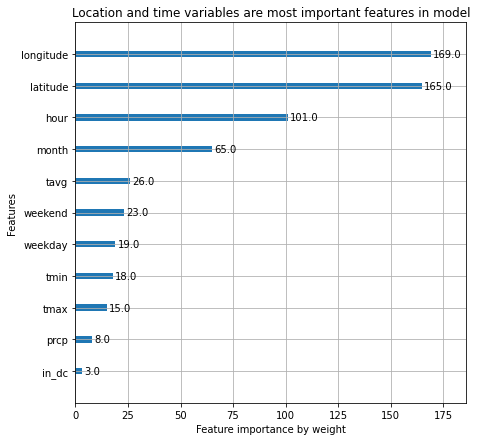

In [135]:
## xgb training matrix
# "binary:logistic"
params = rand_xgb.best_params_
dmatrix = xgb.DMatrix(data = X_train, label = y_train)
xg_reg = xgb.train(params=params, dtrain=dmatrix)
plt.rcParams['figure.figsize'] = [7,7]
xgb.plot_importance(xg_reg,
                    importance_type = "weight",
                    title = "Location and time variables are most important features in model",
                   xlabel = "Feature importance by weight")
# metric that simply sums up how many times each feature is split on
plt.show()

In [146]:
## performance by station for single model
test_df = X_test.copy()
test_df["actual"] = y_test
test_df["predicted"] = y_pred
test_df["sq_error"] = (test_df["actual"] - test_df["predicted"]) ** 2


In [179]:
station_rmse = pd.DataFrame((test_df.groupby(test_df.index)["sq_error"].mean() ** (1/2)))

In [180]:
tmp = test_df.groupby(test_df.index)[["latitude", "longitude", "in_dc"]].min()

In [181]:
set(station_rmse.index).difference(set(tmp.index))

set()

In [186]:
one_mod_plotter = station_rmse.merge(tmp, how = "inner", right_index = True, left_index = True).rename(columns = {"sq_error":"RMSE"})
one_mod_plotter

,RMSE,latitude,longitude,in_dc
station,,,,
10th & E St NW,0.246620,38.895914,-77.026064,1.0
10th & Florida Ave NW,0.216985,38.920387,-77.025672,1.0
10th & G St NW,0.220759,38.898243,-77.026235,1.0
10th & K St NW,0.243406,38.902400,-77.026220,1.0
10th & Monroe St NE,0.243009,38.932514,-76.992889,1.0
...,...,...,...,...
Wisconsin Ave & O St NW,0.201972,38.908490,-77.063586,1.0
Woodglen Dr & Executive Blvd,0.230710,39.043170,-77.113500,0.0
Woodley Park Metro / Calvert St & Connecticut Ave NW,0.234811,38.923389,-77.051833,1.0


In [187]:
one_mod_plotter.RMSE.describe()

count    475.000000
mean       0.214935
std        0.033134
min        0.104048
25%        0.194888
50%        0.217696
75%        0.238010
max        0.358922
Name: RMSE, dtype: float64

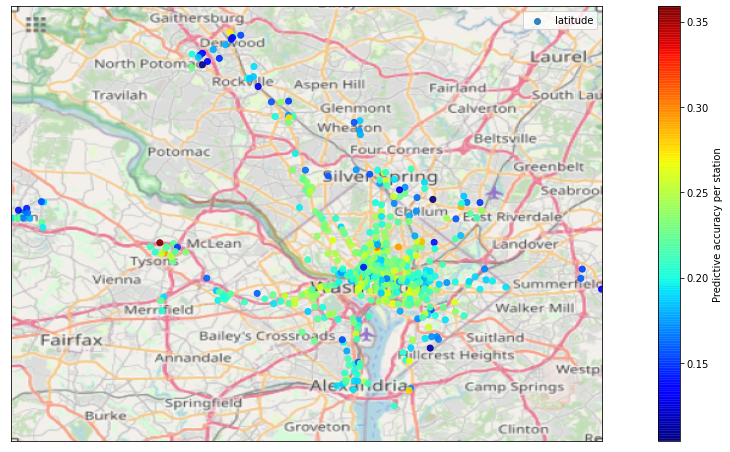

In [196]:

plt.figure(figsize=(20,8))
ax = plt.scatter(x = "longitude", data = one_mod_plotter, y = "latitude", c = "RMSE", #label = one_mod_plotter.index,
            cmap = plt.get_cmap("jet"), alpha = 0.9)
plt.colorbar(ax, label ="Predictive accuracy per station")
#plt.title('No pattern in predictive accuracy based on clusters of stations')
plt.legend()
plt.xlim(-77.369,-76.825)
# The range of y-axis is the range of latitude of this map.
plt.ylim(38.75,39.15)
# Overlap the scatterplot on top of the DC map.
plt.imshow(dc_img, alpha=0.9, extent=[-77.369, -76.825, 38.75, 39.15])
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.show()

In [163]:
test_df[""].nunique()

473

In [160]:
test_df.index.nunique()

475

In [167]:
test_df.groupby(test_df.index)["sq_error"].mean().shape

(488,)

In [ ]:
xgb_model = xgb.XGBRegressor()
params = {'max_depth': [*range(1,11)], 'n_estimators': [*range(50,201, 25)], 'learning_rate': [0.1, 0.05, 0.01]}
clf = GridSearchCV(xgb_model, param_grid = params, verbose=3, n_jobs=-1, cv = 5)

In [ ]:
clf.fit(X_train_final,y_train)

In [ ]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators':[50, 100, 150],
             'max_features':['log2', 'auto', 'sqrt'],
             'min_samples_leaf':[2, 10, 30]}

rf = RandomForestRegressor(random_state=2)
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=3,
                       verbose=1,
                       n_jobs=-1)
best_model = grid_rf.fit(X_train, y_train)

# Predict test set labels
y_pred = best_model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

In [ ]:
cv_results = xgb.cv(dtrain = dmatrix, params = params, nfold =3, num_boost_round = 100,
                   early_stopping_rounds = 10, as_pandas = True, seed = 123, metrics = "logloss")

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

## random forest

1) basic model fit with no hyperparameter tuning

2) hyperparameter tuning via random search CV (due to sample size)

In [80]:
import os
print(os.cpu_count())

8


In [83]:
rf_reg = RandomForestRegressor(random_state = 0)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
mean_squared_error(y_test, y_pred) ** (1/2)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# random forest - random search
params_rf = {'n_estimators':[*range(50,201, 25)],
             'max_features':['log2', None, 'sqrt'],
             'min_samples_leaf':[*range(2,11)]}

rand_rf = RandomizedSearchCV(estimator = rf_reg,
                             param_distributions = params_rf,
                             verbose = 1,
                             n_jobs = 4,
                             cv = 3,
                             n_iter = 5,
                            refit=True)

y_pred = rand_rf.predict(X_test)
print(mean_squared_error(y_test, y_pred) ** (1/2))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [70]:
rand_rf.best_params_

[50, 75, 100, 125, 150, 175, 200]

In [ ]:
# feature importances
rf = RandomForestClassifier(n_estimators=350,
                            random_state=2,max_features = 'auto',
                            min_samples_leaf = 2)
rf.fit(X_train_final, y_train)
rf.predict(X_test_final)

## visualize features
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train_final.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(15,15))
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

## XGBoost

In [ ]:
xgb_model = xgb.XGBRegressor()
params = {'max_depth': [*range(1,11)], 'n_estimators': [*range(50,201, 25)], 'learning_rate': [0.1, 0.05, 0.01]}
clf = GridSearchCV(xgb_model, param_grid = params, verbose=3, n_jobs=-1, cv = 5)

In [ ]:
clf.fit(X_train_final,y_train)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators':[50, 100, 150],
             'max_features':['log2', 'auto', 'sqrt'],
             'min_samples_leaf':[2, 10, 30]}

rf = RandomForestRegressor(random_state=2)
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=3,
                       verbose=1,
                       n_jobs=-1)
best_model = grid_rf.fit(X_train, y_train)

# Predict test set labels
y_pred = best_model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

## data preprocessing

getting dummies and creating the response

In [84]:
## using for classification
def list_to_percentiles(numbers):
    pairs = [*zip(numbers, range(len(numbers)))]
    pairs.sort(key=lambda p: p[0])
    result = [0 for i in range(len(numbers))]
    for rank in range(len(numbers)):
        original_index = pairs[rank][1]
        result[original_index] = rank * 100.0 / (len(numbers)-1)
    return result

In [85]:
# determining percentile for classification
percentiles = pd.DataFrame([*zip(list_to_percentiles(bike.percent_full.tolist()), bike.percent_full.tolist())],
                          columns = ["percentile", "percent_availabile"])
perc_series = percentiles.set_index("percentile").sort_index().squeeze("columns")

In [90]:
round(perc_series.describe(),3)

count    1545931.000
mean           0.454
std            0.257
min            0.000
25%            0.263
50%            0.452
75%            0.636
max            1.000
Name: percent_availabile, dtype: float64

In [86]:
#perc_series.index > 75
print(perc_series.loc[perc_series.index >= 66].head(1))
print(perc_series.loc[perc_series.index < 33].tail(1))
print(perc_series.loc[perc_series.index >= 75].head(1))

percentile
66.000013    0.565217
Name: percent_availabile, dtype: float64
percentile
32.999942    0.315789
Name: percent_availabile, dtype: float64
percentile
75.000032    0.636364
Name: percent_availabile, dtype: float64


In [ ]:
#model['percent_full'] = model.percent_full.apply(lambda x: 2 if x > 0.72 else (0 if x < 0.2 else 1))
bike['percent_full'] = bike.percent_full.apply(lambda x: 1 if x > 0.85 else 0)

In [ ]:
bike.rename({"percent_full":"reshuffle_needed"}, axis = 1, inplace = True)

In [ ]:
## work around to creating a lot of columns
bike.set_index("station", inplace = True)

In [ ]:
#bike = pd.get_dummies(model, columns = ['weekday'], drop_first = True)

In [ ]:
bike = bike.iloc[:, 1:]
bike.dtypes

In [ ]:
bike.pop("region_name")
tmp = bike.pop("reshuffle_needed")
bike.insert(0, "reshuffle_needed", tmp)
bike

In [ ]:
bike.describe().round(2)

In [ ]:
#model.to_csv("model_data.csv")

# skip to here for modeling

## splitting data into test and train

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#df = pd.read_csv("model_data.csv", index_col = "station")

In [ ]:
#df.dtypes

In [ ]:
X = bike.iloc[:, 1:]
y = bike.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

## XGBoost

In [ ]:
# importing XGBoost classification model
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
clf = xgb.XGBClassifier(max_depth = 5, n_estimators = 100, objective = "reg:logistic") # five is best

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_pred, y_test)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
## cross validation
# "binary:logistic"
params = {"objective":"reg:logistic", "max_depth":5, "colsample_bytree": 0.3}

In [ ]:
## xgb training matrix
dmatrix = xgb.DMatrix(data = X_train, label = y_train)

In [ ]:
cv_results = xgb.cv(dtrain = dmatrix, params = params, nfold =3, num_boost_round = 100,
                   early_stopping_rounds = 10, as_pandas = True, seed = 123, metrics = "logloss")

In [ ]:
cv_results

In [ ]:
xg_reg = xgb.train(params=params, dtrain=dmatrix, num_boost_round=100)

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
small = ["longitude", "latitude", "hour", "tmax", "tavg", "tmin", "weekday", "month", "prcp"]
bike_s = bike[small]

In [ ]:
bike_s.columns

In [ ]:
y

In [ ]:
## condensed dataframe
X = bike_s

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
## xgb training matrix
dmatrix = xgb.DMatrix(data = X_train, label = y_train)

In [ ]:
## cross validation
# "binary:logistic"
params = {"objective":"reg:logistic", "max_depth":5, "colsample_bytree": 0.3}

In [ ]:
xg_reg = xgb.train(params=params, dtrain=dmatrix, num_boost_round=100)

In [ ]:
X_train

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
xgb_model = xgb.XGBClassifier()
params = {'max_depth': [*range(2,6)], 'n_estimators': [50, 100, 150]}
clf = GridSearchCV(xgb_model, param_grid = params, verbose=3, n_jobs=-1, cv = 3)

In [ ]:
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

In [ ]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

In [ ]:
clf2 = xgb.XGBClassifier(max_depth = 5, n_estimators = 150, objective = "reg:logistic") # five is best

In [ ]:
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

In [ ]:
xgb.plot_importance(clf2, importance_type = "weight",
                    title = "Location and time variables are most important features in model",
                   xlabel = "Feature importance by weight")
# metric that simply sums up how many times each feature is split on
plt.rcParams['figure.figsize'] = [7, 7]
plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=["No reshuffle", "Reshuffle"]
)
cmp.plot(cmap="YlOrRd")
cmp.ax_.set_title("Model accuracy on testing data is approximately 77%")
plt.show()

## inidividual predictions

In [ ]:
bike.columns

In [ ]:
error = ["reshuffle_needed", "longitude", "latitude", "hour", "tmax", "tavg", "tmin", "weekday", "month", "prcp"]
error_bike = bike[error] 

In [ ]:
def error(station_id):
    df_new = error_bike[error_bike.index == station_id] # Choose the station
    X_error = df_new[df_new.columns[1:]] # Choose all avriables except bike availability percentage 
    y_error = df_new.iloc[:, 0] # Choose bike availability percentage
    y_pred = clf2.predict(X_error)
    return accuracy_score(y_pred,y_error)

In [ ]:
bike.groupby("station").count().sort_values(by = "reshuffle_needed")

In [ ]:
c = bike.groupby("station").count().sort_values(by = "reshuffle_needed").index.unique().tolist()

In [ ]:
# removing smallest stations (under 40)
c.remove("Ridge Rd Community Center")
c.remove("Fort Stanton Rec Center")
c.remove("Valley Ave & Wheeler Rd SE")
c.remove("Dennis Ave & Amherst Ave")

In [ ]:
accuracy_scores = []
for i in range(len(c)):
    accuracy_scores.append(error(c[i]))

In [ ]:
len(accuracy_scores)

In [ ]:
np.mean(accuracy_scores)

In [ ]:
np.median(accuracy_scores)

In [ ]:
min(accuracy_scores)

In [ ]:
max(accuracy_scores)

In [ ]:
c[accuracy_scores.index(max(accuracy_scores))]

In [ ]:
c[accuracy_scores.index(min(accuracy_scores))]

In [ ]:
plt.hist(accuracy_scores, bins = "auto", alpha = 0.7, rwidth = 0.9)
plt.grid(axis = "y")
plt.title("Distribution of model accuracy by station (average accuracy = 80%)")
plt.xlabel("Accuracy")
plt.ylabel("Station Count")
plt.show()

In [ ]:
len(c)

In [ ]:
len(accuracy_scores)

In [ ]:
merger = pd.DataFrame([*zip(c,accuracy_scores)], columns = ["station", "accuracy"])
merger["station"] = merger.station.astype("category")
merger = merger.set_index("station")
merger

In [ ]:
bike.index

In [ ]:
merger.index

In [ ]:
image = merger.merge(bike, how = "left", left_index= True, right_index = True, suffixes = ("_r", "_l"))


In [ ]:
image = image.groupby("station")[["longitude","latitude", "accuracy", "in_dc"]].mean()
image.head()

In [ ]:
dc_img=mpimg.imread('unknown.png')
plt.figure(figsize=(20,8))
scatter = image
ax = plt.scatter(x = "longitude", data = scatter, y = "latitude", c = "accuracy", label = 'Station',
            cmap = plt.get_cmap("jet"), alpha = 0.9)
plt.colorbar(ax, label ="Predictive accuracy per station")
plt.title('No pattern in predictive accuracy based on clusters of stations')
plt.legend()
plt.xlim(-77.369,-76.825)
# The range of y-axis is the range of latitude of this map.
plt.ylim(38.75,39.15)
# Overlap the scatterplot on top of the DC map.
plt.imshow(dc_img, alpha=0.9, extent=[-77.369, -76.825, 38.75, 39.15])
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.show()

In [ ]:
bike.head()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(15280/(15280+7746)) # precision - FP as key
print(15280/(15280+75630)) # recall - FN as key

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
bike.columns

In [ ]:
error = ["percent_full", "longitude", "latitude", "hour", "tmax", "tavg", "tmin", "weekday", "month", "prcp"]
error_bike = bike[error] 

In [ ]:
error_bike.head()

In [ ]:
error_bike.rename({"percent_full":"availability"}, axis = 1, inplace = True)

In [ ]:
error_bike.availability = error_bike.availability.mul(100)

In [ ]:
corr = error_bike.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, annot = True, square=True)
plt.show()

In [ ]:
plt.figure(figsize=(7,5))
ax = plt.axes()
sns.heatmap(corr, annot = True, cbar_kws = {"label":"Estimated correlation coefficient"}, cmap = "inferno")
ax.set_title("Weak linear relationship between availability and features")
plt.show()

In [ ]:
sns.set(font_scale = 1.2)
sns.color_palette("hls")
plt.figure(figsize=(7,5))
ax = sns.histplot(x = "availability", data = error_bike, bins = 10, stat = "probability")
ax.set_xlabel("Availability (in %)")
ax.set_title("Availability has a bimodal distribution at the extreme values")
plt.show()